In [76]:
import matplotlib.pyplot as plt
from pathlib import Path
import numpy as np

In [77]:
run_root = Path('../runs')

In [78]:
def plot(run):
    rows = []
    with open(str(run_root / run / 'train.log')) as fh:
        for stp in [l.strip() for l in fh.readlines()]:
            rows.append(eval(stp))

    train_loss = np.vstack([(r['step'], r['loss']) for r in rows if 'loss' in r])
    valid_loss = np.vstack([(r['step'], r['valid_loss']) for r in rows if 'valid_loss' in r])
    lr = np.vstack([(r['step'], r['lr']) for r in rows if 'lr' in r])
    score = np.vstack([(r['step'], r['score']) for r in rows if 'score' in r])

    plt.figure(figsize=(16,8))
    plt.plot(train_loss[:,0], train_loss[:,1])
    plt.plot(valid_loss[:,0], valid_loss[:,1])
    plt.grid()
    plt.legend(['train loss', 'valid loss', 'lr'])
    plt.title(run)

    plt.figure(figsize=(8,4))
    plt.plot(score[:,0], score[:,1])
    plt.grid()
    plt.title('score')
    
    plt.figure(figsize=(8,4))
    plt.plot(lr[:,0], lr[:,1], 'o')
    plt.grid()
    plt.title('lr')

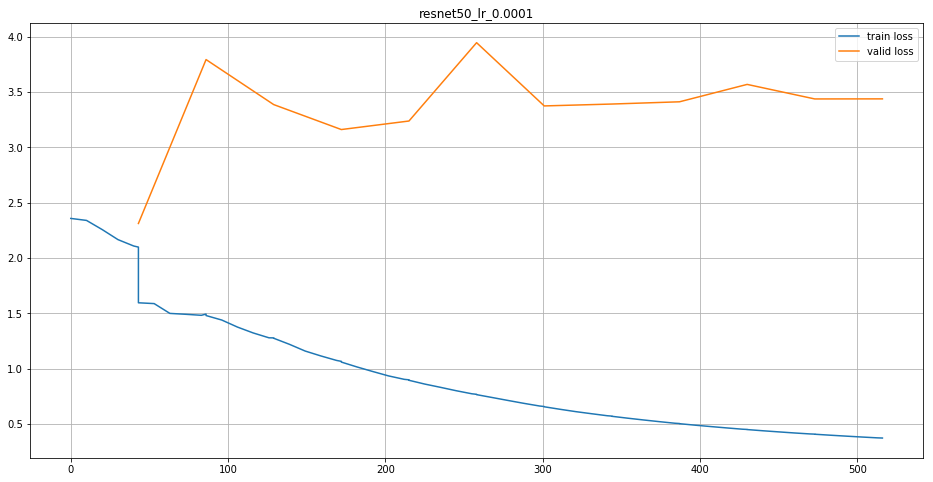

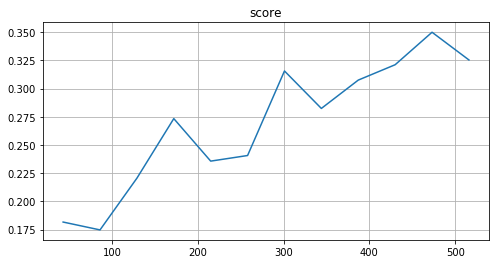

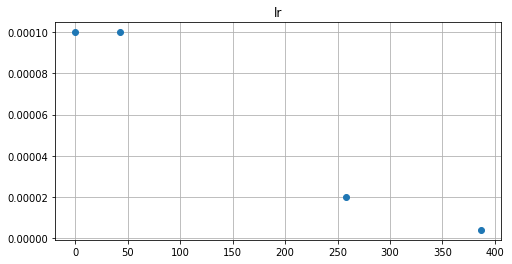

In [82]:
plot('resnet50_lr_0.0001')

In [ ]:
plot('resnet34')

In [ ]:
plot('resnet18')